
<a id='rosen-schooling-model'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>


<a id='index-0'></a>

# Rosen Schooling Model

## Contents

- [Rosen Schooling Model](#Rosen-Schooling-Model)  
  - [A One-Occupation Model](#A-One-Occupation-Model)  
  - [Mapping into HS2013 framework](#Mapping-into-HS2013-framework)  

**Co-author:** Sebastian Graves

This lecture is yet another part of a suite of lectures that use the quantecon DLE class to instantiate models within the
[[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013) class of models described in detail in [Recursive Models of Dynamic Linear Economies](https://lectures.quantecon.org/py/hs_recursive_models.html)

In addition to what’s included in  Anaconda, this lecture uses the quantecon  library

In [1]:
!pip install quantecon

We’ll also need the following imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from collections import namedtuple
from quantecon import DLE
from math import sqrt
%matplotlib inline

## A One-Occupation Model

Ryoo and Rosen’s (2004) [[RR04]](https://lectures.quantecon.org/py/zreferences.html#ryoo2004engineering) partial equilibrium model determines

- a stock of “Engineers” $ N_t $  
- a number of new entrants in engineering school, $ n_t $  
- the wage rate of engineers, $ w_t $  


It takes k periods of schooling to become an engineer

The model consists of the following equations:

- a demand curve for engineers:  


$$
w_t = - \alpha_d N_t + \epsilon_{dt}
$$

- a time-to-build structure of the education process:  


$$
N_{t+k} = \delta_N N_{t+k-1} + n_t
$$

- a definition of the discounted present value of each new engineering
  student:  


$$
v_t = \beta_k \mathbb{E} \sum_{j=0}^\infty (\beta \delta_N)^j w_{t+k+j}
$$

- a supply curve of new students driven by present value $ v_t $:  


$$
n_t = \\alpha_s v_t + \epsilon_{st}
$$

## Mapping into HS2013 framework

We represent this model in the [[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013) framework by

- sweeping the time-to-build structure and the demand for engineers
  into the household technology, and  
- putting the supply of engineers into the technology for producing
  goods  

### Preferences

$$
\Pi = 0, \Lambda=
\left[ {\begin{array}{ccccc}
   \alpha_d & 0 & \cdots & 0
   \end{array} }
   \right]
, \Delta_h =
\left[ {\begin{array}{ccccc}
   \delta_N & 1 & 0 & \cdots & 0 \\ 0 & 0 & 1 & \cdots & 0 \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 0 & \cdots& \cdots & 0 & 1 \\ 0 & 0 & 0 & \cdots & 0
   \end{array} }
   \right]
   , \Theta_h =
\left[ {\begin{array}{c}
   0 \\ 0 \\ \vdots \\ 0 \\ 1
   \end{array} }
   \right]
$$

where $ \Lambda $ is a k+1 x 1 matrix, $ \Delta_h $ is a k_1 x
k+1 matrix, and $ \Theta_h $ is a k+1 x 1 matrix

This specification sets $ N_t = h_{1t-1} $, $ n_t = c_t $,
$ h_{\tau+1,t-1} = n_{t-(k-\tau)} $ for $ \tau = 1,...,k $

Below we set things up so that the number of years of education, k, can
be varied

### Technology

To capture Ryoo and Rosen’s [[RR04]](https://lectures.quantecon.org/py/zreferences.html#ryoo2004engineering) supply curve, we use the physical
technology:

$$
c_t = i_t + d_{1t}
$$

$$
\psi_1i_t = g_t
$$

where $ \psi_1 $ is inversely proportional to $ \alpha_s $

### Information

Because we  want $ b_t = \epsilon_{dt} $ and $ d_{1t} =\epsilon_{st} $, we set

$$
A_{22}=
\left[ {\begin{array}{ccc}
   1 & 0 & 0 \\ 0 & \rho_s & 0 \\ 0 & 0 & \rho_d
   \end{array} }
   \right] \
,   C_2 =
\left[ {\begin{array}{ccc}
   0 & 0 \\ 1 & 0 \\ 0 & 1
   \end{array} }
   \right] \
,   U_b =
\left[ {\begin{array}{cccc}
   30 & 0 & 1
   \end{array} }
   \right] \
,   U_d =
\left[ {\begin{array}{c}
   10 & 1 & 0 \\ 0 & 0 & 0
   \end{array} }
   \right] \
$$

where $ \rho_s $ and $ \rho_d $ describe the persistence of the
supply and demand shocks

In [3]:
Information = namedtuple('Information', ['a22', 'c2','ub','ud'])
Technology = namedtuple('Technology', ['ϕ_c', 'ϕ_g', 'ϕ_i', 'γ', 'δ_k', 'θ_k'])
Preferences = namedtuple('Preferences', ['β', 'l_λ', 'π_h', 'δ_h', 'θ_h'])

### Effects of Changes in Education Technology and Demand

We now study how changing

- the number of years of education required to become an engineer and  
- the slope of the demand curve  


affects responses to demand shocks

To begin, we set $ k = 4 $ and $ \alpha_d = 0.1 $

In [4]:
k = 4  # Number of periods of schooling required to become engineer

β = np.array([[1 / 1.05]])
α_d = np.array([[0.1]])
α_s = 1
ε_1 = 1e-7
λ_1 = np.ones((1, k)) * ε_1
l_λ = np.hstack((α_d, λ_1))  # Use of ε_1 is trick to aquire detectability, see HS2013 p. 228 footnote 4
π_h = np.array([[0]])

δ_n = np.array([[0.95]])
d1 = np.vstack((δ_n, np.zeros((k - 1, 1))))
d2 = np.hstack((d1, np.eye(k)))
δ_h = np.vstack((d2, np.zeros((1, k + 1))))

θ_h = np.vstack((np.zeros((k, 1)),
                 np.ones((1, 1))))

ψ_1 = 1 / α_s

ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [-1]])
ϕ_i = np.array([[-1], [ψ_1]])
γ = np.array([[0], [0]])

δ_k = np.array([[0]])
θ_k = np.array([[0]])

ρ_s = 0.8
ρ_d = 0.8

a22 = np.array([[1,   0,   0],
                [0, ρ_s,   0],
                [0,   0, ρ_d]])

c2 = np.array([[0, 0], [10, 0], [0, 10]])
ub = np.array([[30, 0, 1]])
ud = np.array([[10, 1, 0], [0, 0, 0]])

Info1 = Information(a22, c2, ub, ud)
Tech1 = Technology(ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
Pref1 = Preferences(β, l_λ, π_h, δ_h, θ_h)

Econ1 = DLE(Info1, Tech1, Pref1)

We create three other instances by:

1. Raising $ \alpha_d $ to 2  
1. Raising k to 7  
1. Raising k to 10  

In [5]:
α_d = np.array([[2]])
l_λ = np.hstack((α_d, λ_1))
Pref2 = Preferences(β, l_λ, π_h, δ_h, θ_h)
Econ2 = DLE(Info1, Tech1, Pref2)

α_d = np.array([[0.1]])

k = 7
λ_1 = np.ones((1, k)) * ε_1
l_λ = np.hstack((α_d, λ_1))
d1 = np.vstack((δ_n, np.zeros((k - 1, 1))))
d2 = np.hstack((d1, np.eye(k)))
δ_h = np.vstack((d2, np.zeros((1, k+1))))
θ_h = np.vstack((np.zeros((k, 1)),
                 np.ones((1, 1))))

Pref3 = Preferences(β, l_λ, π_h, δ_h, θ_h)
Econ3 = DLE(Info1, Tech1, Pref3)

k = 10
λ_1 = np.ones((1, k)) * ε_1
l_λ = np.hstack((α_d, λ_1))
d1 = np.vstack((δ_n, np.zeros((k - 1, 1))))
d2 = np.hstack((d1, np.eye(k)))
δ_h = np.vstack((d2, np.zeros((1, k + 1))))
θ_h = np.vstack((np.zeros((k, 1)),
                 np.ones((1, 1))))

Pref4 = Preferences(β, l_λ, π_h, δ_h, θ_h)
Econ4 = DLE(Info1, Tech1, Pref4)

shock_demand = np.array([[0], [1]])

Econ1.irf(ts_length=25, shock=shock_demand)
Econ2.irf(ts_length=25, shock=shock_demand)
Econ3.irf(ts_length=25, shock=shock_demand)
Econ4.irf(ts_length=25, shock=shock_demand)

The first figure plots the impulse response of $ n_t $ (on the left)
and $ N_t $ (on the right) to a positive demand shock, for
$ \alpha_d = 0.1 $ and $ \alpha_d = 2 $

When $ \alpha_d = 2 $, the number of new students $ n_t $ rises
initially, but the response then turns negative

A positive demand shock raises wages, drawing new students into the
profession

However, these new students raise $ N_t $

The higher is $ \alpha_d $, the larger the effect of this rise in
$ N_t $ on wages

This counteracts the demand shock’s positive effect on wages, reducing
the number of new students in subsequent periods

Consequently, when $ \alpha_d $ is lower, the effect of a demand
shock on $ N_t $ is larger

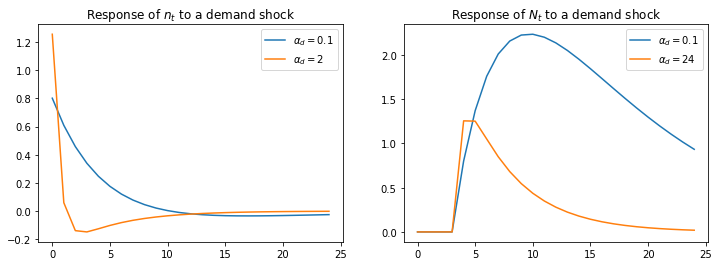

In [6]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(Econ1.c_irf,label='$\\alpha_d = 0.1$')
plt.plot(Econ2.c_irf,label='$\\alpha_d = 2$')
plt.legend()
plt.title('Response of $n_t$ to a demand shock')

plt.subplot(122)
plt.plot(Econ1.h_irf[:, 0], label='$\\alpha_d = 0.1$')
plt.plot(Econ2.h_irf[:, 0], label='$\\alpha_d = 24$')
plt.legend()
plt.title('Response of $N_t$ to a demand shock')
plt.show()

The next figure plots the impulse response of $ n_t $ (on the left)
and $ N_t $ (on the right) to a positive demand shock, for
$ k=4 $, $ k=7 $ and $ k=10 $ (with $ \alpha_d = 0.1 $)

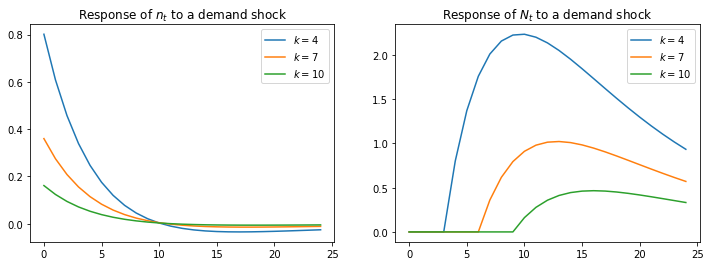

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(Econ1.c_irf, label='$k=4$')
plt.plot(Econ3.c_irf, label='$k=7$')
plt.plot(Econ4.c_irf, label='$k=10$')
plt.legend()
plt.title('Response of $n_t$ to a demand shock')

plt.subplot(122)
plt.plot(Econ1.h_irf[:,0], label='$k=4$')
plt.plot(Econ3.h_irf[:,0], label='$k=7$')
plt.plot(Econ4.h_irf[:,0], label='$k=10$')
plt.legend()
plt.title('Response of $N_t$ to a demand shock')
plt.show()

Both panels in the above figure show that raising k lowers the effect of
a positive demand shock on entry into the engineering profession

Increasing the number of periods of schooling lowers
the number of new students in response to a demand shock

This occurs because  with longer required schooling, new students ultimately benefit less from the impact of that shock on wages